In [ ]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Introduction and background**

**TOPIC:** How can a wellness technology company play it smart?

Bellabeat is a high-tech firm that creates health-focused smart goods. They provide a variety of smart gadgets that collect data on exercise, sleep, stress, and reproductive health, empowering women with information about their own health and behaviors. The major goal of this case is to evaluate fitness data from smart devices and identify how it may assist Bellabeat open new business potential. We will focus on one of Bellabeat's products, the Bellabeat app. The Bellabeat app gives users health information on their exercise, sleep, stress, menstrual cycle, and mindfulness practices. Users may utilize this data to better understand their existing habits and make healthier choices. The Bellabeat app links to the array of smart wellness items.

**ASK Phase:**

**BUSINESS TASK**: The purpose of this analysis is to identify patterns in the use of non-Bellabeat smart devices, apply these insights to Bellabeat's customer base, and make recommendations for how these results might impact Bellabeat's marketing strategy.

**Key Stakeholders:** 
* Urška Sršen: Bellabeat’s co founder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team, Product development and customer service teams.

**Prepare Phase:**

**About Data:**
The data source used for the case study is FitBit Fitness Tracker Data. This dataset is stored and was made available in Kaggle, through Mobius.

**Data Organization and Information:**
The open-source data available to us was generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. The data is available to us in 18 .csv files. Each document represents different quantitative data from the data stored in Fitbit. The data is organized in long format since each row is one time point per subject, so each subject will have data in multiple rows. Every user has a unique ID and different rows since data is stored and saved by day and time.

**Data Credibility:**
We can say data has bias issues because of the limitation of size (30 users) and not having any specific region or country information we can categorize this as a sampling bias. We are not sure if the sample is representative of the entire population. Another problem we would encounter is that the dataset is not a current one which is one for the cases of ROCCC.

**Description of Data**

| Table Name                     | Type                   | Description                                                                                     |
|---------------------------------|------------------------|-------------------------------------------------------------------------------------------------|
| dailyActivity_merged            | Microsoft Excel CSV     | Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories  |
| dailyCalories_merged            | Microsoft Excel CSV     | Daily Calories over 31 days of 33 users                                                          |
| dailyIntensities_merged         | Microsoft Excel CSV     | Daily Intensity over 31 days of 33 users. Measured in Minutes and Distance, dividing groups in 4 categories: Sedentary, Lightly Active, Fairly Active, Very Active |
| dailySteps_merged               | Microsoft Excel CSV     | Daily Steps over 31 days of 33 users                                                             |
| heartrate_seconds_merged        | Microsoft Excel CSV     | Exact day and time heartrate logs for just 7 users                                               |
| hourlyCalories_merged           | Microsoft Excel CSV     | Hourly Calories burned over 31 days of 33 users                                                  |
| hourlyIntensities_merged        | Microsoft Excel CSV     | Hourly total and average intensity over 31 days of 33 users                                      |
| hourlySteps_merged              | Microsoft Excel CSV     | Hourly Steps over 31 days of 33 users                                                            |
| minuteCaloriesNarrow_merged     | Microsoft Excel CSV     | Calories burned every minute over 31 days of 33 users (Every minute in single row)               |
| minuteCaloriesWide_merged       | Microsoft Excel CSV     | Calories burned every minute over 31 days of 33 users (Every minute in single column)            |
| minuteIntensitiesNarrow_merged  | Microsoft Excel CSV     | Intensity counted by minute over 31 days of 33 users (Every minute in single row)                |
| minuteIntensitiesWide_merged    | Microsoft Excel CSV     | Intensity counted by minute over 31 days of 33 users (Every minute in single column)             |
| minuteMETsNarrow_merged         | Microsoft Excel CSV     | Ratio of the energy you are using in a physical activity compared to the energy you would use at rest. Counted in minutes |
| minuteSleep_merged              | Microsoft Excel CSV     | Log Sleep by Minute for 24 users over 31 days. Value column not specified                        |
| minuteStepsNarrow_merged        | Microsoft Excel CSV     | Steps tracked every minute over 31 days of 33 users (Every minute in single row)                 |
| minuteStepsWide_merged          | Microsoft Excel CSV     | Steps tracked every minute over 31 days of 33 users (Every minute in single column)              |
| sleepDay_merged                 | Microsoft Excel CSV     | Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed       |
| weightLogInfo_merged            | Microsoft Excel CSV     | Weight tracked by day in Kg and Pounds over 30 days. Calculation of BMI. 5 users report weight manually; 3 users do not. In total, there are 8 users |

**Process Phase:**

**Installing and loading common packages and libraries**



In [16]:
install.packages(c("ggpubr", "tidyverse", "here", "skimr", "janitor", "lubridate", "ggrepel"))
library(ggpubr)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




**Load your CSV files**

We will upload the datasets that will help us answer our business task. On our analysis we will focus on the following datasets:

* dailyActivity_merged
* sleepDay_merged 
* hourlySteps_merged


In [19]:
dailyActivity_merged <- read_csv(file= "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay_merged <- read_csv(file= "/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourlySteps_merged <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityHour
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or 

**Explore a few key tables**


In [20]:
# Take a look at the dailyActivity_merged data.

head(dailyActivity_merged)
str(dailyActivity_merged)

# Identify all the columns in the dailyActivity_merged data.
colnames(dailyActivity_merged)


# Take a look at the sleepDay_merged data.

head(sleepDay_merged)
str(sleepDay_merged)

# Identify all the columns in the sleepDay_merged data.

colnames(sleepDay_merged)

# Take a look at hourlySteps_merged data.

head(hourlySteps_merged)
str(hourlySteps_merged)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

[1] "Id"                       "ActivityDate"            
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] "Id"                 "SleepDay"           "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


**Clean and format data**


In [21]:
# How many unique participants are there in each dataframe? 

n_unique(dailyActivity_merged$Id)
n_unique(sleepDay_merged$Id)
n_unique(hourlySteps_merged$Id)

#Let us look out for the duplicates if any available

sum(duplicated(dailyActivity_merged))
sum(duplicated(sleepDay_merged))
sum(duplicated(hourlySteps_merged))

#Removing duplicates
daily_activity <- dailyActivity_merged %>%
  distinct() %>%
  drop_na()

daily_sleep <- sleepDay_merged %>%
  distinct() %>%
  drop_na()

hourly_steps <- hourlySteps_merged %>%
  distinct() %>%
  drop_na()

#Let us confirm if the duplicates are removed or not
sum(duplicated(daily_sleep))


[1] 33

[1] 24

[1] 33

[1] 0

[1] 3

[1] 0

[1] 0

**Cleaning and Renaming column names**
We have to make sure that column names are using the same format in all datasets since we will merge them later on. We are changing the format of all columns to lowercase.

In [22]:
clean_names(daily_activity)
daily_activity<- rename_with(daily_activity, tolower)
clean_names(daily_sleep)
daily_sleep <- rename_with(daily_sleep, tolower)
clean_names(hourly_steps)
hourly_steps <- rename_with(hourly_steps, tolower)

#Maintaining consistency with time and date for merging.
daily_activity <- daily_activity %>%
  rename(date = activitydate) %>%
  mutate(date = as_date(date, format = "%m/%d/%Y"))

daily_sleep <- daily_sleep %>%
  rename(date = sleepday) %>%
  mutate(date = as_date(date,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(daily_activity)
head(daily_sleep)

#Hourly_steps dataset we will convert date string to date-time.
hourly_steps<- hourly_steps %>% 
  rename(date_time = activityhour) %>% 
  mutate(date_time = as.POSIXct(date_time,format ="%m/%d/%Y %I:%M:%S %p" , tz=Sys.timezone()))
head(hourly_steps)
  
#Merging these two datasets together.
  
daily_activity_sleep <- merge(daily_activity, daily_sleep, by=c ("id", "date"))
glimpse(daily_activity_sleep)


id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_hour,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0
1503960366,4/12/2016 6:00:00 AM,0
1503960366,4/12/2016 7:00:00 AM,0
1503960366,4/12/2016 8:00:00 AM,250


id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
<dbl>,<date>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,1,327,346
1503960366,2016-04-13,2,384,407
1503960366,2016-04-15,1,412,442
1503960366,2016-04-16,2,340,367
1503960366,2016-04-17,1,700,712
1503960366,2016-04-19,1,304,320


id,date_time,steptotal
<dbl>,<dttm>,<dbl>
1503960366,2016-04-12 00:00:00,373
1503960366,2016-04-12 01:00:00,160
1503960366,2016-04-12 02:00:00,151
1503960366,2016-04-12 03:00:00,0
1503960366,2016-04-12 04:00:00,0
1503960366,2016-04-12 05:00:00,0


Rows: 410
Columns: 18
$ id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ date                     <date> 2016-04-12, 2016-04-13, 2016-04-15, 2016-04-…
$ totalsteps               <dbl> 13162, 10735, 9762, 12669, 9705, 15506, 10544…
$ totaldistance            <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ trackerdistance          <dbl> 8.50, 6.97, 6.28, 8.16, 6.48, 9.88, 6.68, 6.3…
$ loggedactivitiesdistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactivedistance       <dbl> 1.88, 1.57, 2.14, 2.71, 3.19, 3.53, 1.96, 1.3…
$ moderatelyactivedistance <dbl> 0.55, 0.69, 1.26, 0.41, 0.78, 1.32, 0.48, 0.3…
$ lightactivedistance      <dbl> 6.06, 4.71, 2.83, 5.04, 2.51, 5.03, 4.24, 4.6…
$ sedentaryactivedistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ veryactiveminutes        <dbl> 25, 21, 29, 36, 38, 50, 28, 19, 41, 39, 73, 3…
$ fairlyactiveminutes      <dbl> 13, 19, 34, 10, 20, 31, 12, 8, 21, 5, 14, 23,…
$ lightlyactivemin

**Analyze and Share Phase:**

Let us classify the users on their steps count based on the fitbit users data we have.
* Sedentary - Less than 5000 steps a day.
* Lightly active - Between 5000 and 7499 steps a day.
* Fairly active - Between 7500 and 9999 steps a day.
* Very active - More than 10000 steps a day.


In [23]:
#Let us calculate the daily steps average of users
daily_average <- daily_activity_sleep %>%
  group_by(id) %>%
  summarise (mean_daily_steps = mean(totalsteps), mean_daily_calories = mean(calories), mean_daily_sleep = mean(totalminutesasleep))
head(daily_average)

#For our analysis we need to classify the users based on step count, for which we create a new column “user_type”.
user_type <- daily_average %>%
  mutate(user_type = case_when(
    mean_daily_steps < 5000 ~ "sedentary",
    mean_daily_steps >= 5000 & mean_daily_steps < 7499 ~ "lightly active", 
    mean_daily_steps >= 7500 & mean_daily_steps < 9999 ~ "fairly active", 
    mean_daily_steps >= 10000 ~ "very active"
  ))
head(user_type)

#We will create a data frame with the percentage of each user type to visualize them on a graph.

user_type_percent <- user_type %>%
  group_by(user_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(user_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))

user_type_percent$user_type <- factor(user_type_percent$user_type , levels = c("very active", "fairly active", "lightly active", "sedentary"))
head(user_type_percent)



id,mean_daily_steps,mean_daily_calories,mean_daily_sleep
<dbl>,<dbl>,<dbl>,<dbl>
1503960366,12405.680,1872.280,360.2800
1644430081,7967.750,2977.750,294.0000
1844505072,3477.000,1676.333,652.0000
1927972279,1490.000,2316.200,417.0000
2026352035,5618.679,1540.786,506.1786
2320127002,5079.000,1804.000,61.0000


id,mean_daily_steps,mean_daily_calories,mean_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12405.680,1872.280,360.2800,very active
1644430081,7967.750,2977.750,294.0000,fairly active
1844505072,3477.000,1676.333,652.0000,sedentary
1927972279,1490.000,2316.200,417.0000,sedentary
2026352035,5618.679,1540.786,506.1786,lightly active
2320127002,5079.000,1804.000,61.0000,lightly active


user_type,total_percent,labels
<fct>,<dbl>,<chr>
fairly active,0.3750000,38%
lightly active,0.2083333,21%
sedentary,0.2083333,21%
very active,0.2083333,21%


**Visualizing the above results**

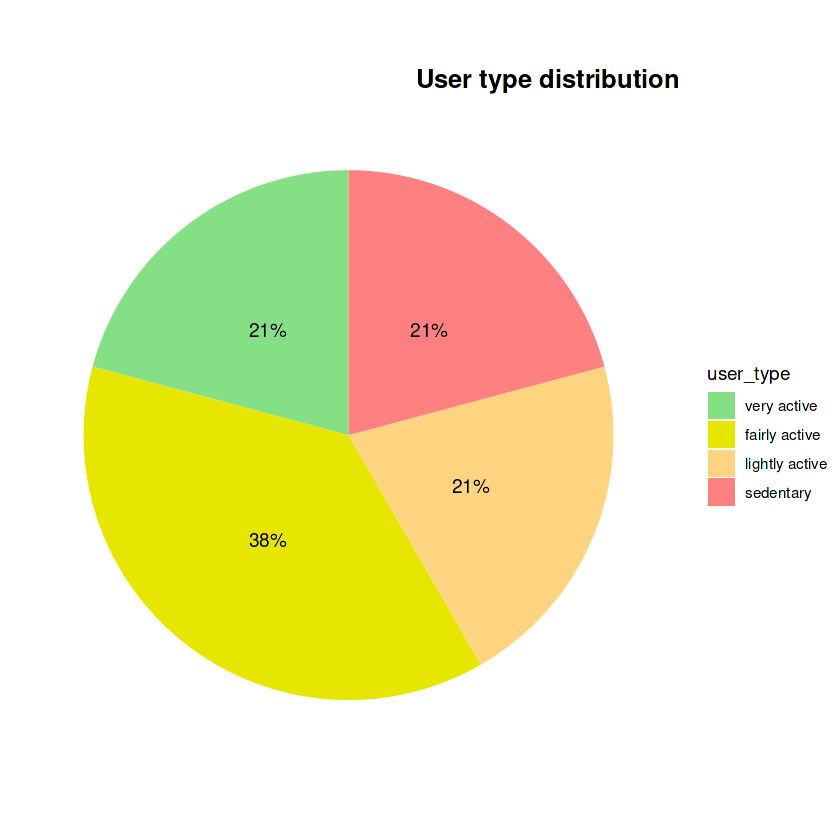

In [24]:
#Visualize the above results using the ggplot2.
user_type_percent %>%
  ggplot(aes(x="",y=total_percent, fill=user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 1.0, size=15, face = "bold")) +
  scale_fill_manual(values = c("#85e085","#e6e600", "#ffd480", "#ff8080")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")



**Steps and minutes asleep per weekday**

Let us calculate on what days of the week the users are more active and on what days of the week users sleep more.


In [25]:
weekday_steps_sleep <- daily_activity_sleep %>%
  mutate(weekday = weekdays(date))

weekday_steps_sleep$weekday <-ordered(weekday_steps_sleep$weekday, levels=c("Monday", "Tuesday", "Wednesday", "Thursday",
                                                                            "Friday", "Saturday", "Sunday"))

weekday_steps_sleep <-weekday_steps_sleep%>%
  group_by(weekday) %>%
  summarize (daily_steps = mean(totalsteps), daily_sleep = mean(totalminutesasleep))

head(weekday_steps_sleep)


weekday,daily_steps,daily_sleep
<ord>,<dbl>,<dbl>
Monday,9273.217,419.5000
Tuesday,9182.692,404.5385
Wednesday,8022.864,434.6818
Thursday,8183.516,401.2969
Friday,7901.404,405.4211
Saturday,9871.123,419.0702


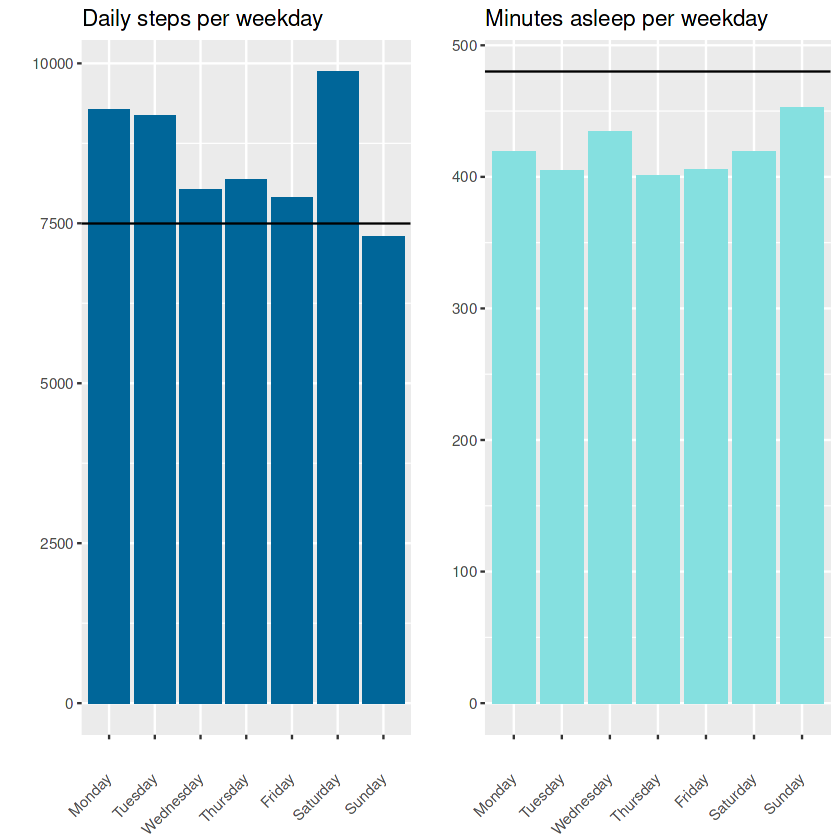

In [26]:
#Plotting for the results of steps and sleep of a weekday

ggarrange(
  ggplot(weekday_steps_sleep) +
    geom_col(aes(weekday, daily_steps), fill = "#006699") +
    geom_hline(yintercept = 7500) +
    labs(title = "Daily steps per weekday", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1)),
  ggplot(weekday_steps_sleep, aes(weekday, daily_sleep)) +
    geom_col(fill = "#85e0e0") +
    geom_hline(yintercept = 480) +
    labs(title = "Minutes asleep per weekday", x= "", y = "") +
    theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))
)


From the graphs above we observed that:

* Users walk daily the recommended amount of steps of 7500 besides Sunday's.
* Users don't sleep the recommended amount of minutes/ hours - 8 hours.

**Hourly steps throughout the day**

Finding at what time of the day the users are more active


In [27]:
hourly_steps <- hourly_steps %>%
  separate(date_time, into = c("date", "time"), sep= " ") %>%
  mutate(date = ymd(date)) 
head(hourly_steps)


id,date,time,steptotal
<dbl>,<date>,<chr>,<dbl>
1503960366,2016-04-12,NA,373
1503960366,2016-04-12,01:00:00,160
1503960366,2016-04-12,02:00:00,151
1503960366,2016-04-12,03:00:00,0
1503960366,2016-04-12,04:00:00,0
1503960366,2016-04-12,05:00:00,0


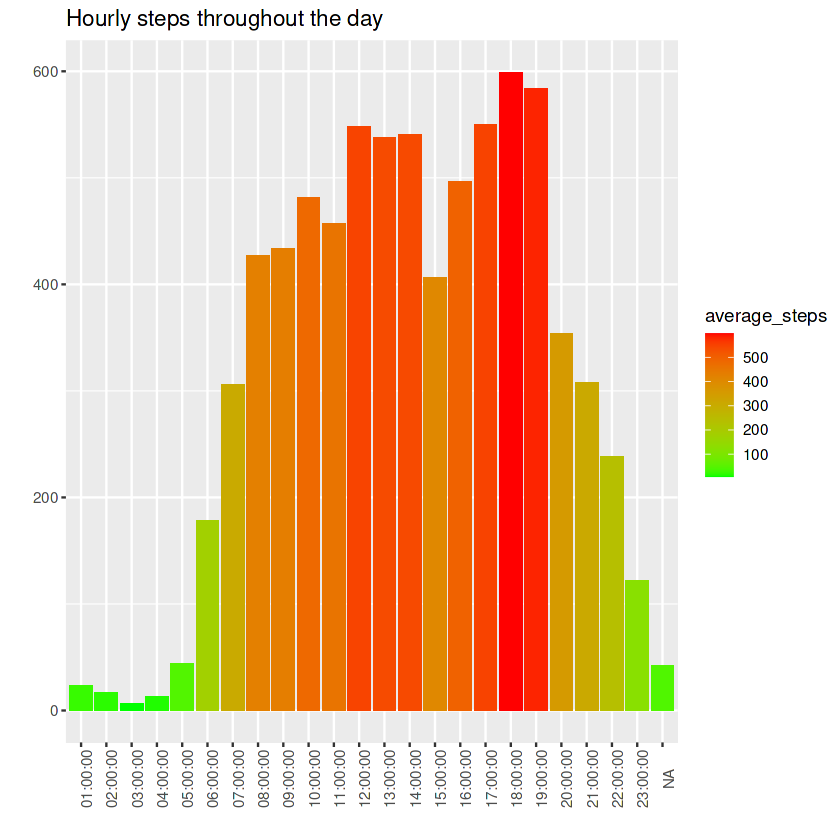

In [28]:
#Visualizing the hourly steps data throughout the day

hourly_steps %>%
  group_by(time) %>%
  summarize(average_steps = mean(steptotal)) %>%
  ggplot() +
  geom_col(mapping = aes(x=time, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))


**Correlations**

Let us find if there is any correlation between different variables we encountered in our analysis:

* Daily steps and daily sleep.
* Daily steps and calories.


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


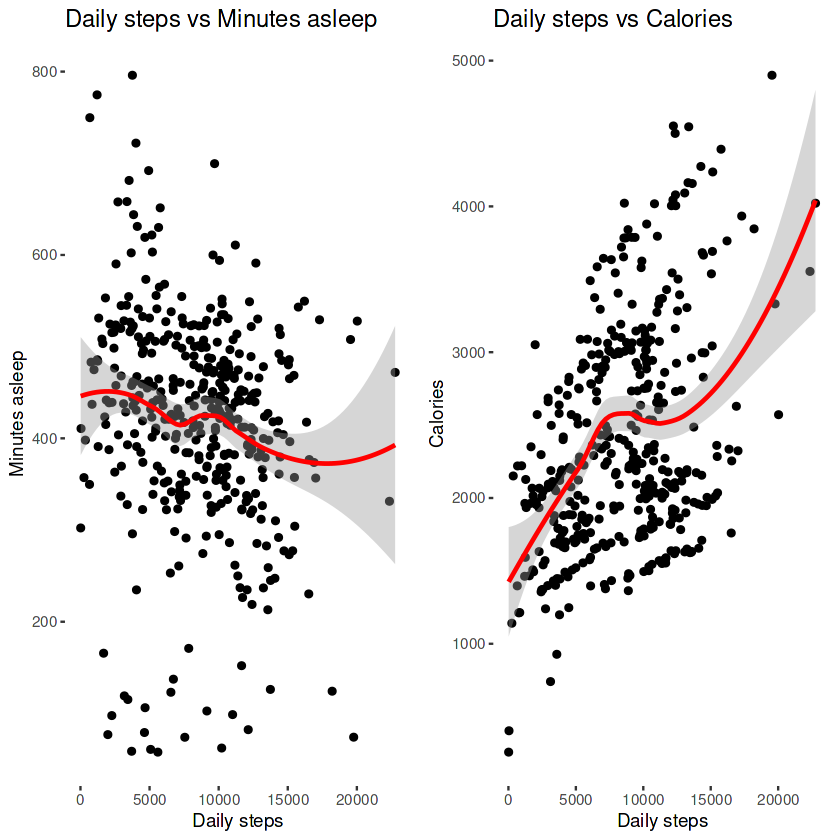

In [29]:
#Correlation between daily steps and sleep, daily steps and calories

ggarrange(
  ggplot(daily_activity_sleep, aes(x=totalsteps, y=totalminutesasleep))+
    geom_jitter() +
    geom_smooth(color = "red") + 
    labs(title = "Daily steps vs Minutes asleep", x = "Daily steps", y= "Minutes asleep") +
    theme(panel.background = element_blank(),
          plot.title = element_text( size=14)), 
  ggplot(daily_activity_sleep, aes(x=totalsteps, y=calories))+
    geom_jitter() +
    geom_smooth(color = "red") + 
    labs(title = "Daily steps vs Calories", x = "Daily steps", y= "Calories") +
    theme(panel.background = element_blank(),
          plot.title = element_text( size=14))
)


Based on the results we got from the plots:

* There is no correlation between daily steps and the amount of minutes users sleep a day.
* But we can see a positive correlation between steps and calories burned. We can see that the smoothing curve is a positive inclination that means the more steps walked the more calories burned.

**Smart device Use**

We will calculate the number of users that use their smart device on a daily basis, classifying our sample into three categories knowing that the date interval is 31 days:

* high use - users who use their device between 21 and 31 days.
* moderate use - users who use their device between 10 and 20 days.
* low use - users who use their device between 1 and 10 days.


In [30]:
#Dividing users based on the usage of smart devices.

daily_use <- daily_activity_sleep %>%
  group_by(id) %>%
  summarize(days_used=sum(n())) %>%
  mutate(usage = case_when(
    days_used >= 1 & days_used <= 10 ~ "low use",
    days_used >= 11 & days_used <= 20 ~ "moderate use", 
    days_used >= 21 & days_used <= 31 ~ "high use", 
  ))
head(daily_use)

#Calculate the percentage dataframe to visualize the above results

daily_use_percent <- daily_use %>%
  group_by(usage) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(usage) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))
daily_use_percent$usage <- factor(daily_use_percent$usage, levels = c("high use", "moderate use", "low use"))
head(daily_use_percent)



id,days_used,usage
<dbl>,<int>,<chr>
1503960366,25,high use
1644430081,4,low use
1844505072,3,low use
1927972279,5,low use
2026352035,28,high use
2320127002,1,low use


usage,total_percent,labels
<fct>,<dbl>,<chr>
high use,0.500,50%
low use,0.375,38%
moderate use,0.125,12%


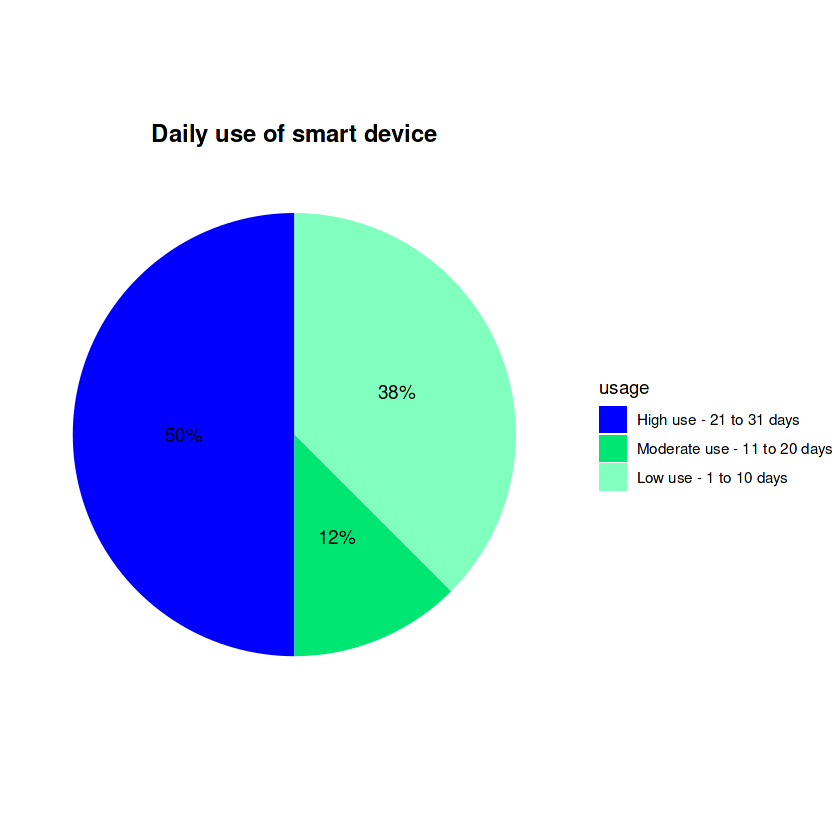

In [31]:
#Visualizing the results to better understand our analysis.

daily_use_percent %>%
  ggplot(aes(x="",y=total_percent, fill=usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=14, face = "bold")) +
  geom_text(aes(label = labels),
            position = position_stack(vjust = 0.5))+
  scale_fill_manual(values = c("#0000FF","#00e673","#80ffbf"),
                    labels = c("High use - 21 to 31 days",
                               "Moderate use - 11 to 20 days",
                               "Low use - 1 to 10 days"))+
  labs(title="Daily use of smart device")


After analyzing our results we can observe that
* 50% of the users of our sample use their device frequently - between 21 to 31 days.
* 12% use their device 11 to 20 days.
* 38% of our sample rarely use their device.

**Smart device usage according to the time spent in a day**

For better understanding of available data, we want to know how many minutes consumers spend each day wearing their device. To do this, we will combine the produced daily_use data frame with daily_activity to be able to filter results based on device usage.


In [32]:
#How many minutes do users wear their device per day

daily_use_merged <- merge(daily_activity, daily_use, by=c ("id"))
head(daily_use_merged)


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,25,high use
2,1503960366,2016-05-06,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896,25,high use
3,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820,25,high use
4,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947,25,high use
5,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,25,high use
6,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,25,high use


Creating three different categories based on the time users wore the device every day :
* All day - device was worn all day.
* More than half day - device was worn more than half of the day.
* Less than half day - device was worn less than half of the day.

In [33]:
#New dataframe that tells how long users wore the device in a day
minutes_worn <- daily_use_merged %>% 
mutate(total_minutes_worn = veryactiveminutes+fairlyactiveminutes+lightlyactiveminutes+sedentaryminutes)%>%
  mutate (percent_minutes_worn = (total_minutes_worn/1440)*100) %>%
  mutate (worn = case_when(
    percent_minutes_worn == 100 ~ "All day",
    percent_minutes_worn < 100 & percent_minutes_worn >= 50~ "More than half day",    percent_minutes_worn < 50 & percent_minutes_worn > 0 ~ "Less than half day"
 ))
head(minutes_worn)


,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,days_used,usage,total_minutes_worn,percent_minutes_worn,worn
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>
1,1503960366,2016-05-07,11992,7.71,7.71,0,2.46,2.12,3.13,0,37,46,175,833,1821,25,high use,1091,75.76389,More than half day
2,1503960366,2016-05-06,12159,8.03,8.03,0,1.97,0.25,5.81,0,24,6,289,754,1896,25,high use,1073,74.51389,More than half day
3,1503960366,2016-05-01,10602,6.81,6.81,0,2.29,1.60,2.92,0,33,35,246,730,1820,25,high use,1044,72.50000,More than half day
4,1503960366,2016-04-30,14673,9.25,9.25,0,3.56,1.42,4.27,0,52,34,217,712,1947,25,high use,1015,70.48611,More than half day
5,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,25,high use,1094,75.97222,More than half day
6,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,25,high use,1033,71.73611,More than half day


To show our results better, we will generate new data frames, as we did in the above cases. In this scenario, we'll build four independent data frames and put them on the same display.
* The first data frame will provide the total number of users and determine the proportion of minutes spent wearing the device based on the three categories selected.
* The three remaining data frames are filtered by daily user category to show the difference between daily and time use.


In [34]:
#Creating new data frames to show total users and % of minutes worn for each category of users(HighUse,ModerateUse,LowUse)
minutes_worn_percent<- minutes_worn%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))
minutes_worn_highuse <- minutes_worn%>%
  filter (usage == "high use")%>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))
minutes_worn_moduse <- minutes_worn%>%
  filter(usage == "moderate use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))
minutes_worn_lowuse <- minutes_worn%>%
  filter (usage == "low use") %>%
  group_by(worn) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(worn) %>%
  summarise(total_percent = total / totals) %>%
  mutate(labels = scales::percent(total_percent))
minutes_worn_highuse$worn <- factor(minutes_worn_highuse$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_percent$worn <- factor(minutes_worn_percent$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_moduse$worn <- factor(minutes_worn_moduse$worn, levels = c("All day", "More than half day", "Less than half day"))
minutes_worn_lowuse$worn <- factor(minutes_worn_lowuse$worn, levels = c("All day", "More than half day", "Less than half day"))
head(minutes_worn_percent)
head(minutes_worn_highuse)
head(minutes_worn_moduse)
head(minutes_worn_lowuse)


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.36465638,36%
Less than half day,0.03506311,4%
More than half day,0.60028050,60%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.06756757,6.8%
Less than half day,0.04324324,4.3%
More than half day,0.88918919,88.9%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.2666667,27%
Less than half day,0.0400000,4%
More than half day,0.6933333,69%


worn,total_percent,labels
<fct>,<dbl>,<chr>
All day,0.80223881,80%
Less than half day,0.02238806,2%
More than half day,0.17537313,18%


Now that we've developed four data frames and arranged the wear level categories, we can see our results in the graphs below. All of the graphs have been grouped together for easier viewing.

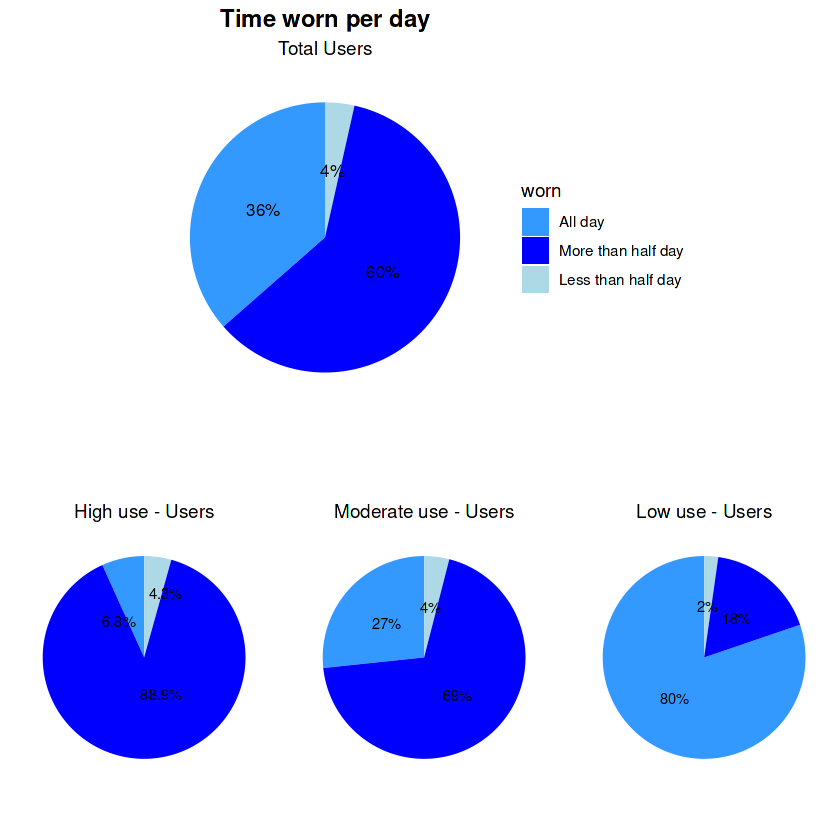

In [35]:
#Lets visualize the results we got using the pie charts
ggarrange(
  ggplot(minutes_worn_percent, aes(x="",y=total_percent, fill=worn)) +
    geom_bar(stat = "identity", width = 1)+
    coord_polar("y", start=0)+
    theme_minimal()+
    theme(axis.title.x= element_blank(),
          axis.title.y = element_blank(),
          panel.border = element_blank(),
          panel.grid = element_blank(),
          axis.ticks = element_blank(),
          axis.text.x = element_blank(),
          plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
          plot.subtitle = element_text(hjust = 0.5)) +
          scale_fill_manual(values = c("#3399ff","#0000FF","#ADD8E6"))+
       geom_text(aes(label = labels),
              position = position_stack(vjust = 0.5), size = 3.5)+
    labs(title="Time worn per day", subtitle = "Total Users"),
  ggarrange(
    ggplot(minutes_worn_highuse, aes(x="",y=total_percent, fill=worn)) +
      geom_bar(stat = "identity", width = 1)+
      coord_polar("y", start=0)+
      theme_minimal()+
      theme(axis.title.x= element_blank(),
            axis.title.y = element_blank(),
            panel.border = element_blank(),
            panel.grid = element_blank(), 
            axis.ticks = element_blank(),
            axis.text.x = element_blank(),
            plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
            plot.subtitle = element_text(hjust = 0.5), 
            legend.position = "none")+
      scale_fill_manual(values = c("#3399ff","#0000FF","#ADD8E6"))+
      geom_text_repel(aes(label = labels),
                      position = position_stack(vjust = 0.5), size = 3)+
      labs(title="", subtitle = "High use - Users"), 
    ggplot(minutes_worn_moduse, aes(x="",y=total_percent, fill=worn)) +
      geom_bar(stat = "identity", width = 1)+
      coord_polar("y", start=0)+
      theme_minimal()+
      theme(axis.title.x= element_blank(),
            axis.title.y = element_blank(),
            panel.border = element_blank(),
            panel.grid = element_blank(),
            axis.ticks = element_blank(),
            axis.text.x = element_blank(),
            plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
            plot.subtitle = element_text(hjust = 0.5),
            legend.position = "none") +
      scale_fill_manual(values = c("#3399ff","#0000FF","#ADD8E6"))+
      geom_text(aes(label = labels),
                position = position_stack(vjust = 0.5), size = 3)+
      labs(title="", subtitle = "Moderate use - Users"), 
    ggplot(minutes_worn_lowuse, aes(x="",y=total_percent, fill=worn)) +
      geom_bar(stat = "identity", width = 1)+
      coord_polar("y", start=0)+
      theme_minimal()+
      theme(axis.title.x= element_blank(),
            axis.title.y = element_blank(),
            panel.border = element_blank(),
            panel.grid = element_blank(),
            axis.ticks = element_blank(),
            axis.text.x = element_blank(),
            plot.title = element_text(hjust = 0.5, size=14, face = "bold"),
            plot.subtitle = element_text(hjust = 0.5),
            legend.position = "none") +
      scale_fill_manual(values = c("#3399ff","#0000FF","#ADD8E6"))+
      geom_text(aes(label = labels),
                position = position_stack(vjust = 0.5), size = 3)+
      labs(title="", subtitle = "Low use - Users"),
    ncol = 3),
  nrow = 2)


**Findings:**

According to our graphs, 36% of users use the gadget all day, 60% for more than half a day, and only 4% for less than half a day. If we limit the total users based on the days they have used the device and verify each day how long they have worn it, we get the following results:
* High users: Only 6.8% of users who have used their gadget for 21 to 31 days wear it all day. 88.9% wear the gadget for more than half of the day, but not all day.
* Moderate users: 69% of moderate users use the device more than half day on the 11-20 days they use. This states that moderate users wear the gadget on a less frequent basis.
* Low users: Even though they use their device for less than 10 days in a month, 80% of users wear it all day when they use the device.


**ACT phase:**

Based on the business task assigned to us, Bellabeat's purpose is to empower women by giving them the facts they need to find themselves.

Based on our results, I recommend that we use our own tracking data for additional analysis in order to respond to our business job and assist Bellabeat with their purpose. Because we did not have any demographic information about users, the datasets we utilized have a tiny sample size and may be biased. Knowing that our primary target demographic is young and adult women, I would advise the team to continue looking for trends in order to design a marketing strategy geared toward them.

The recommendations I would provide are as follows:
* **Daily step notification and encouragement:**
Group users by activity level and deliver daily step reminders. Send warnings when users do not meet the CDC-recommended 8,000 steps. Post relevant material to the app about the health advantages of walking. For which we can take use of AI-powered insights to tailor step objectives based on specific user data. Incorporate wearable AI capabilities that deliver real-time, adaptive feedback, and combine them with fitness challenges among friends or family via the app to boost social incentive.
* **Sleep Notification System and Techniques:**
Send people reminders to go to bed at the desired hour and provide resources like breathing methods, calming music, or podcasts. Use smart sleep tracking tools such as biofeedback loops and sleep-stage analysis. This can provide users with tailored recommendations depending on their sleep patterns, such as when to wake up during light sleep periods, therefore improving sleep quality.
* **Games and Reward system:**
Create a game within the app to reward users for their daily activities. Users may earn stars, which can be redeemed for items or discounts.Introduce blockchain-based awards or non-fungible tokens (NFTs) for achieving milestones. These can be one-of-a-kind digital treasures or exclusive access to activities, making the incentive system more interesting and technologically advanced.
* **Increase the daily use of devices:**
Promote Bellabeat's water resistance, extended battery life, and stunning styles for every occasion to the 50% of consumers who do not use the gadget on a regular basis. Integrate automated user engagement features like reminders or health-based information to encourage consumers to connect with their devices on a frequent basis. Leveraging augmented reality (AR) in the app to allow users to put on simulated Bellabeat accessory designs might increase engagement and fashion appeal.
* **Emphasis on Personalized Data Insights:**
Continue studying user tracking data to develop a marketing plan that targets Bellabeat's primary audience of young and adult women. Apply machine learning and predictive analytics to provide highly personalized health insights. Predictive algorithms, for example, may foresee health concerns and make targeted suggestions, increasing long-term loyalty through high-tech individualized treatment.

The analysis of smart device usage data highlighted major trends in user activity and sleep habits, offering valuable insights for Bellabeat's marketing and product strategy. Bellabeat may improve user engagement and loyalty by adding personalized step and sleep notifications, a gamified reward system, and emphasizing product characteristics like water resistance and long battery life. Bellabeat will be able to provide tailored health insights by leveraging current technologies such as AI and machine learning, which will coincide with their objective of empowering women through data and help them develop a closer relationship with their target audience.
